In [2]:
import librosa
import IPython.display as ipd
audio_data="D:/music_genre_recognition/Data/genres_original/blues/blues.00000.wav"
x,sr=librosa.load(audio_data,sr=44100)
ipd.Audio(audio_data)



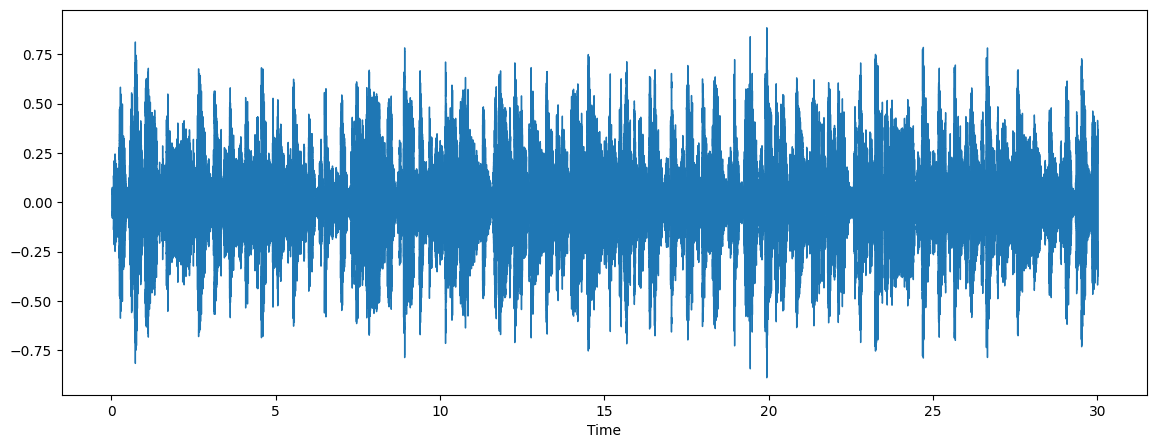

In [4]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

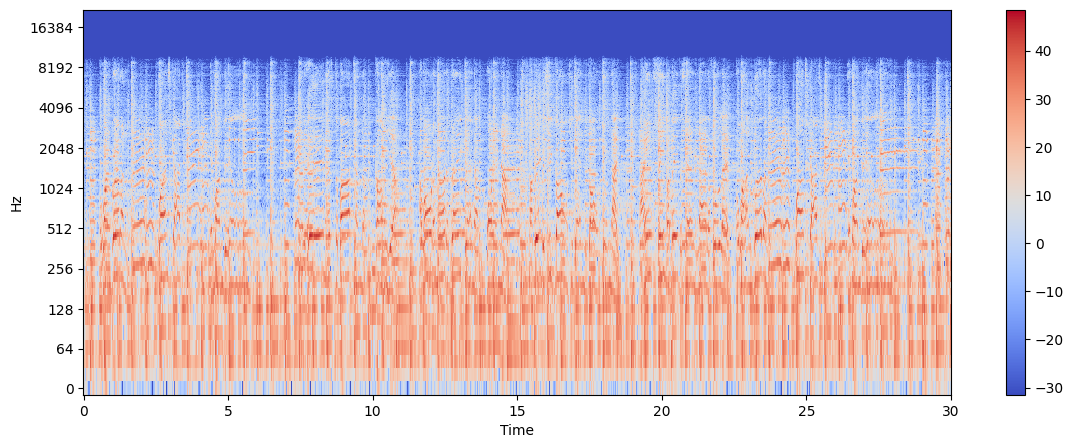

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

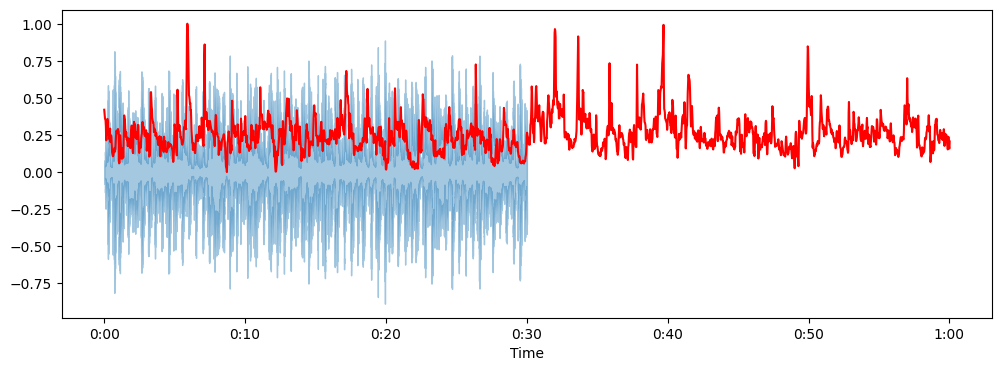

In [12]:
import sklearn.preprocessing
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
#光谱质心 频谱 质心 表示频谱能量集中在哪个频率上，换句话说，它表示声音的“质心”位于何处。这就像一个加权平均值
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

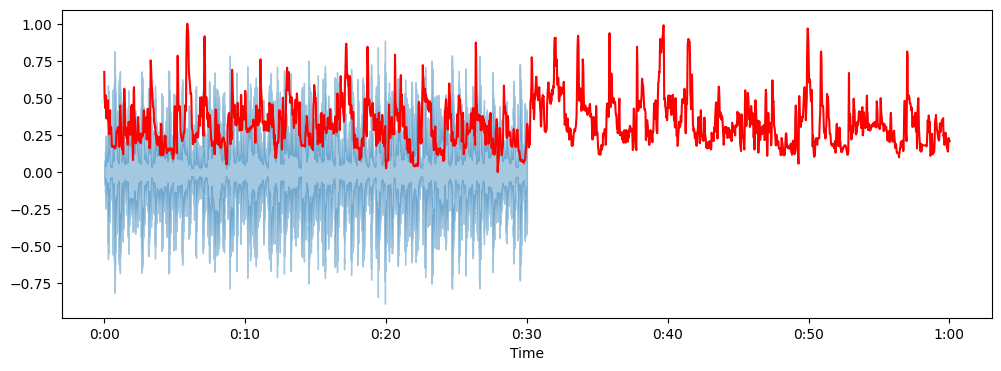

In [15]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
#频谱滚降它是信号形状的度量。它表示高频下降到 0 的频率,计算功率谱中 85% 功率位于较低频率的区间的比例。

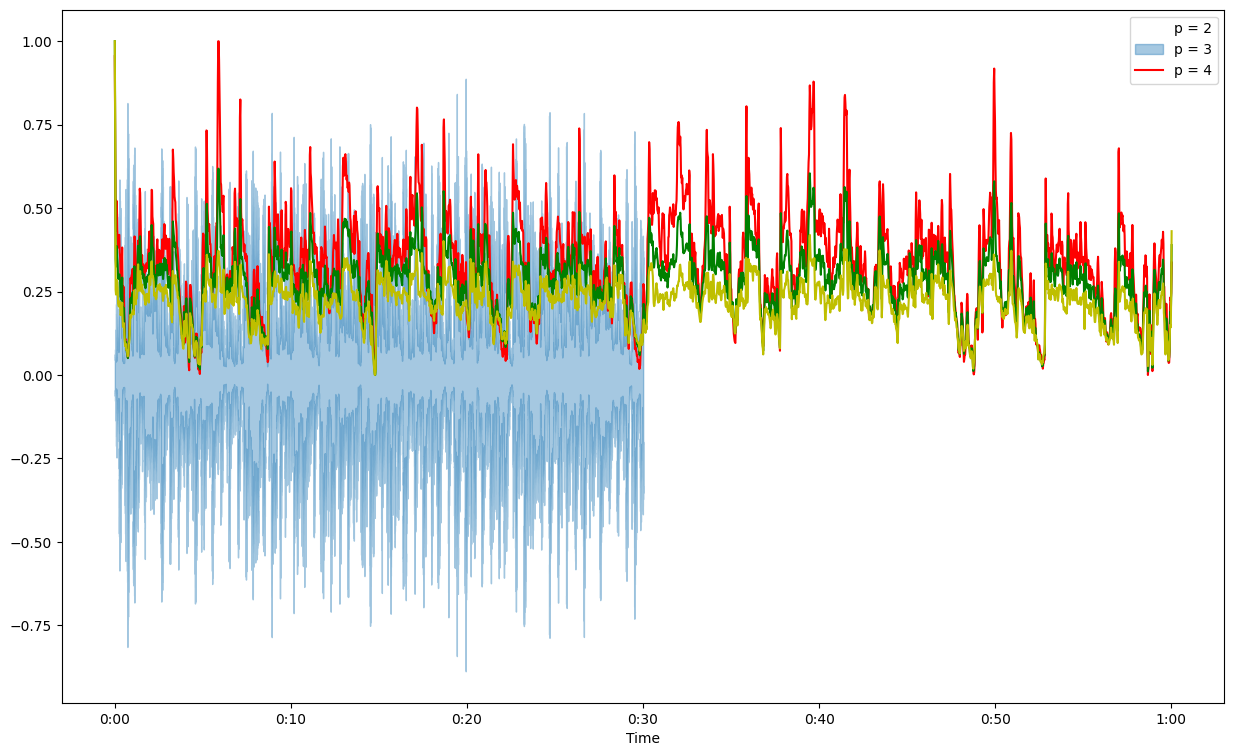

In [17]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
#光谱带宽定义为峰值最大值一半处光带的宽度（或半峰全宽 [FWHM]），用波长轴上的两条垂直红线和 λSB 表示

In [ ]:
#过零率
n0 = 9000
n1 = 9100 
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

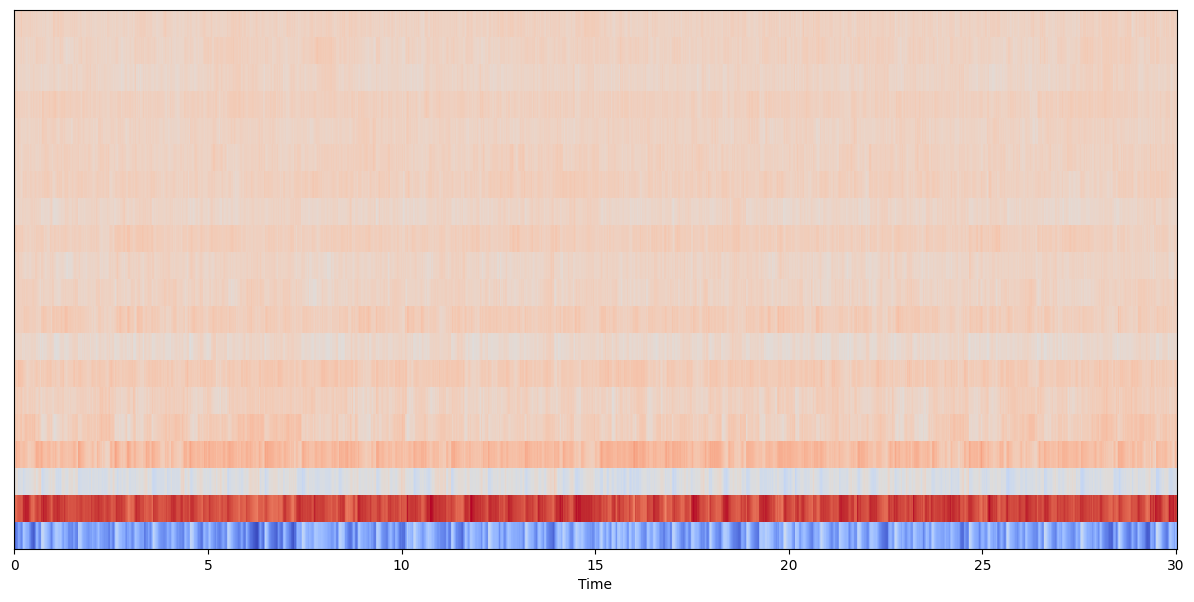

In [22]:
# 梅尔频率倒谱系数（MFCC）梅尔频率倒谱系数 (MFCC) 是一小组特征（通常约 10-20 个），可简明描述频谱包络的​​整体形状。它模拟了人声的特征。
mfccs = librosa.feature.mfcc(y=x, sr=sr)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

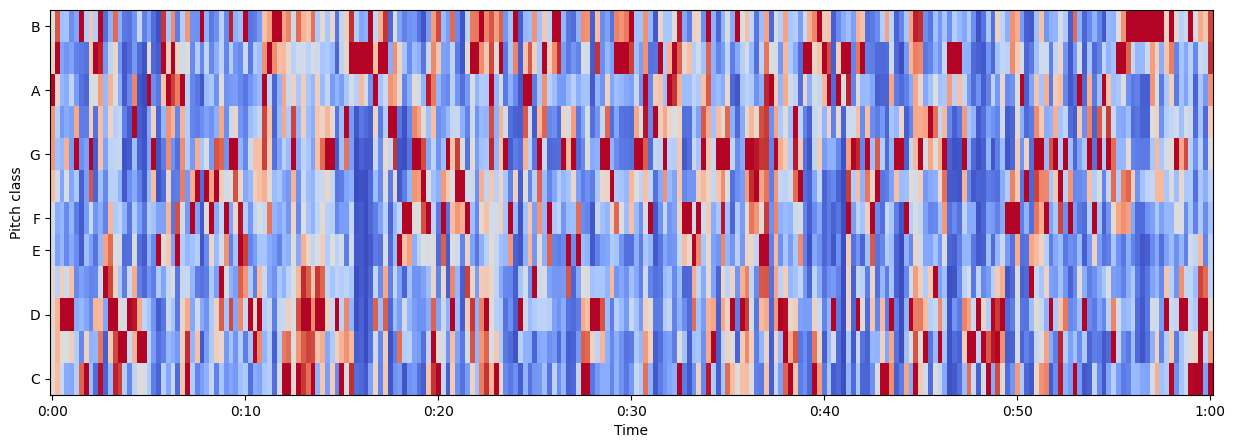

In [25]:
#色度
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=sr//8)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=sr//8, cmap='coolwarm')

In [26]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [28]:
# 现在将音频数据文件wav转换为 PNG 格式的图像或基本上提取每个音频的频谱图
#"D:/music_genre_recognition/42-data/genres_original"
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'D:/music_genre_recognition/42-data/genres_original/{g}'):
        songname = f'D:/music_genre_recognition/42-data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off')
        plt.savefig(f'D:/music_genre_recognition/new_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 800x800 with 0 Axes>

In [29]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [31]:
file = open('genre_data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'D:/music_genre_recognition/42-data/genres_original/{g}'):
        songname = f'D:/music_genre_recognition/42-data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('genre_data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())